In [94]:
import cv2
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
import keras.layers as layers
import tensorflow as tf
import random
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

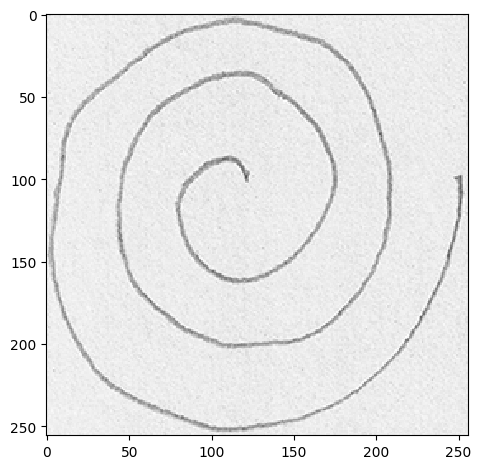

In [60]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 1
X_train = np.zeros((69, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros(69, dtype=np.uint8)
for i in range(1,37):
    im = imread('C:/Users/arnav/OneDrive/Desktop/Parkinson_disease_detection/spiral/training/parkinson/P({}).png'.format(i))
    X_train[i-1,:,:,0] = im[:,:,0]
    Y_train[i-1] = 1
for i in range(1,34):
    im = imread('C:/Users/arnav/OneDrive/Desktop/Parkinson_disease_detection/spiral/training/healthy/H({}).png'.format(i))
    X_train[i+36-1,:,:,0] = im[:,:,0]    
imshow(X_train[54,:,:,0])

In [61]:
#Shuffling the input arrays
shuffler = np.random.permutation(len(X_train))
X_train = X_train[shuffler]
Y_train = Y_train[shuffler]
X_train = X_train.astype("float32") / 255

In [62]:
num_classes = 2
input_shape = (256, 256, 1)

In [63]:
#Defining the model(CNN)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(2, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(6, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(12, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(1, activation="sigmoid"),        
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 2)       20        
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 2)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 4)       76        
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 4)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 6)         222       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 6)        

In [64]:
#Augmenting Training DataSet
data_generator = ImageDataGenerator(
        rotation_range=25,
        horizontal_flip=True,
        width_shift_range=0.02,
        height_shift_range=0.02,
)
data_generator.fit(X_train)

In [93]:
#Training the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit_generator(data_generator.flow(X_train, Y_train), epochs=200)

C:\Users\arnav\AppData\Local\Temp\ipykernel_14176\944882878.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator.flow(X_train, Y_train), epochs=200)


Epoch 1/200
3/3 [==============================] - 2s 94ms/step - loss: 0.6932 - accuracy: 0.5217
Epoch 2/200
3/3 [==============================] - 0s 94ms/step - loss: 0.6923 - accuracy: 0.5217
Epoch 3/200
3/3 [==============================] - 0s 180ms/step - loss: 0.6920 - accuracy: 0.5217
Epoch 4/200
3/3 [==============================] - 0s 176ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 5/200
3/3 [==============================] - 0s 93ms/step - loss: 0.6931 - accuracy: 0.5217
Epoch 6/200
3/3 [==============================] - 0s 97ms/step - loss: 0.6925 - accuracy: 0.5217
Epoch 7/200
3/3 [==============================] - 0s 93ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 8/200
3/3 [==============================] - 0s 90ms/step - loss: 0.6926 - accuracy: 0.5217
Epoch 9/200
3/3 [==============================] - 0s 180ms/step - loss: 0.6926 - accuracy: 0.5217
Epoch 10/200
3/3 [==============================] - 0s 106ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 11/200
3/

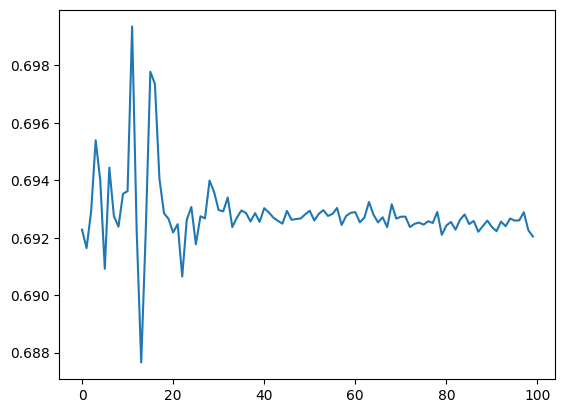

In [86]:
#Plotting the loss function
plt.plot(history.history['loss'])

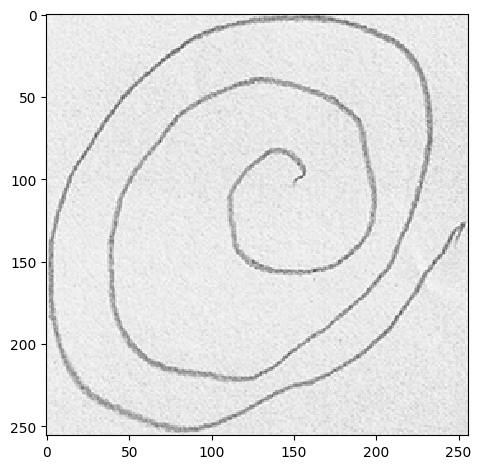

In [88]:
X_test = np.zeros((30, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros(30, dtype=np.uint8)
for i in range(1,16):
    im = imread('C:/Users/arnav/OneDrive/Desktop/Parkinson_disease_detection/spiral/testing/parkinson/P({}).png'.format(i))
    X_test[i-1,:,:,0] = im[:,:,0]
    Y_test[i-1] = 1
for i in range(1,16):
    im = imread('C:/Users/arnav/OneDrive/Desktop/Parkinson_disease_detection/spiral/testing/healthy/H({}).png'.format(i))
    X_test[i+15-1,:,:,0] = im[:,:,0]    
imshow(X_test[12,:,:,0])

In [89]:
#Shuffling the input array
shuffler = np.random.permutation(len(X_test))
X_test = X_test[shuffler]
Y_test = Y_test[shuffler]
X_test = X_test.astype("float32") / 255
#Y_test

In [90]:
#Augmenting Test DataSet
data_generator = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        width_shift_range=0.02,
        height_shift_range=0.02,
)
data_generator.fit(X_test)

In [91]:
#Testing the CNN
score = model.evaluate(data_generator.flow(X_test, Y_test), verbose=0)
print("Test accuracy:", score[0])
print("Test loss:", score[1])

Test accuracy: 0.6933284997940063
Test loss: 0.5


In [92]:
from keras.applications.vgg16 import preprocess_input 
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

1/1 [==============================] - 0s 110ms/step


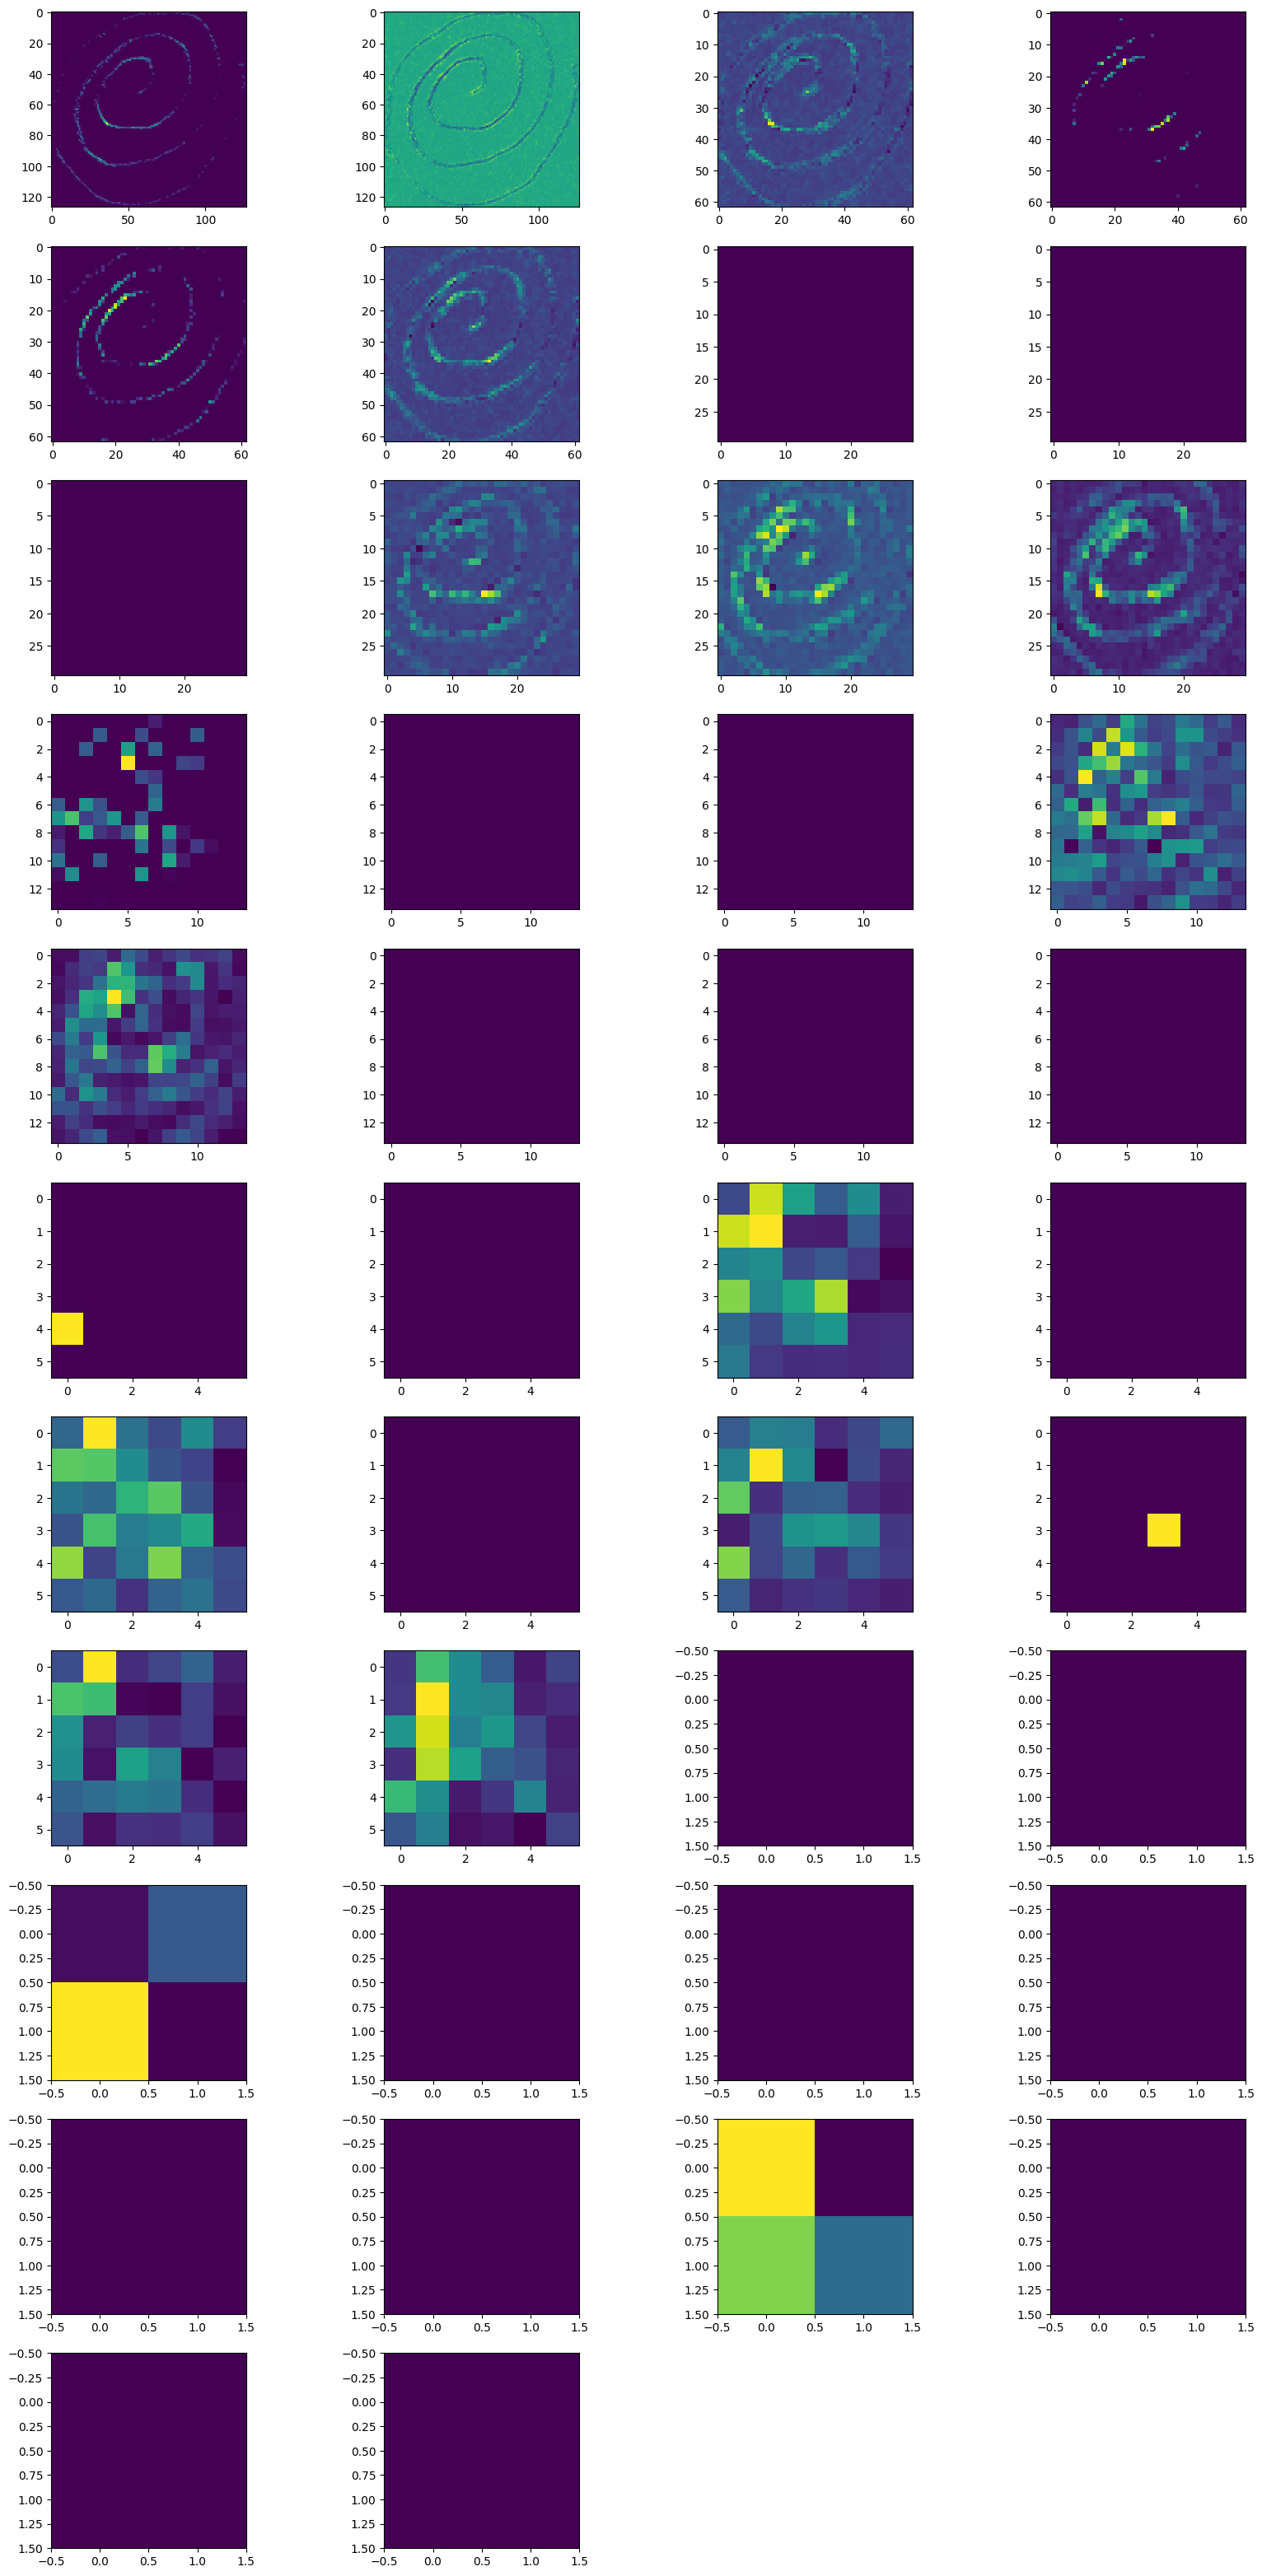

In [72]:
#Extracting feature maps for each image
img = X_test[2]
img = expand_dims(img, axis=0)
fig = plt.figure(figsize = (20,40))

plt_count = 1
filt_count = 2
for i in range(1,12,2):
    model_feature = Model(inputs=model.inputs, outputs=model.layers[i].output)
    feature_maps = model_feature.predict(img)
    for j in range(filt_count):          
        fig.add_subplot(11,4,plt_count)
        plt.imshow(feature_maps[0,:,:,j])
        plt_count += 1
    filt_count += 2    

plt.show()

In [73]:
print(Y_test[5])

1


In [74]:
y_pred = model.predict(X_test)
print(y_pred)
res = []
for y in y_pred:    
    if y < 0.5:
        res.append(0)
    else:
        res.append(1)
        
print(res)

1/1 [==============================] - 0s 212ms/step
[[0.50429654]
 [0.5039942 ]
 [0.5045045 ]
 [0.5047863 ]
 [0.50409377]
 [0.5040694 ]
 [0.50415343]
 [0.5041247 ]
 [0.50439566]
 [0.504007  ]
 [0.5041247 ]
 [0.50416046]
 [0.50409377]
 [0.50415343]
 [0.5047863 ]
 [0.50416046]
 [0.50430477]
 [0.5040694 ]
 [0.5042003 ]
 [0.5045045 ]
 [0.50439566]
 [0.5043624 ]
 [0.50429654]
 [0.5043624 ]
 [0.5044993 ]
 [0.504007  ]
 [0.5044993 ]
 [0.5042003 ]
 [0.5039943 ]
 [0.50430477]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Parkinson Detected


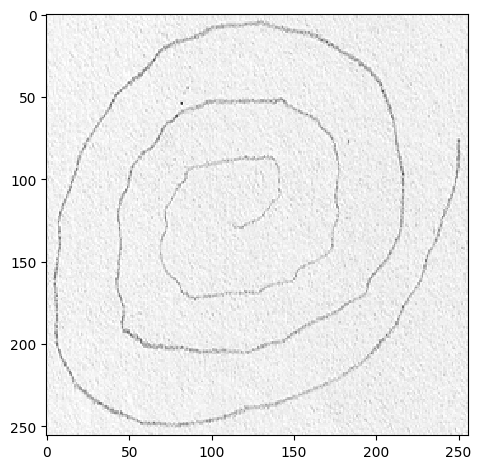

In [97]:
imshow(X_test[14,:,:,0])
if res[14] == 0:
    print("Healthy Person")
else:
    print("Parkinson Detected")

Parkinson Detected


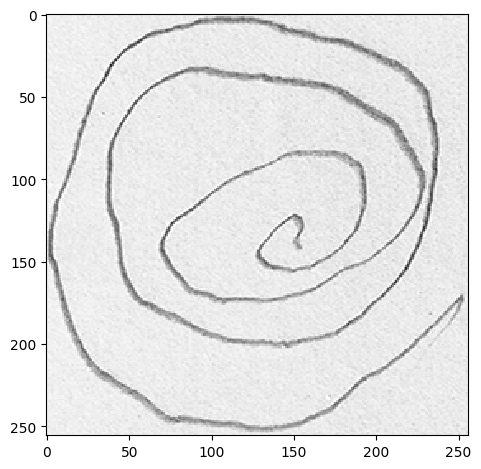

In [96]:
imshow(X_test[21,:,:,0])
if res[21] == 0:
    print("Healthy Person")
else:
    print("Parkinson Detected")

In [77]:
Y_test

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [79]:
#precision_score(Y_true, Y_pred)
act_pos = [1 for _ in range(15)]
act_neg = [0 for _ in range(15)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(13)] + [1 for _ in range(2)]
pred_neg = [1 for _ in range(6)] + [0 for _ in range(9)]
y_pred = pred_pos + pred_neg
#calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: ', precision)

Precision:  0.25


In [80]:
from sklearn.metrics import recall_score
# define actual
act_pos = [1 for _ in range(15)]
act_neg = [0 for _ in range(15)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(2)] + [1 for _ in range(13)]
pred_neg = [0 for _ in range(15)]
y_pred = pred_pos + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, average='binary')
print('Recall: ', recall)

Recall:  0.8666666666666667


In [81]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred)

print(cf_matrix)

[[9 6]
 [8 7]]


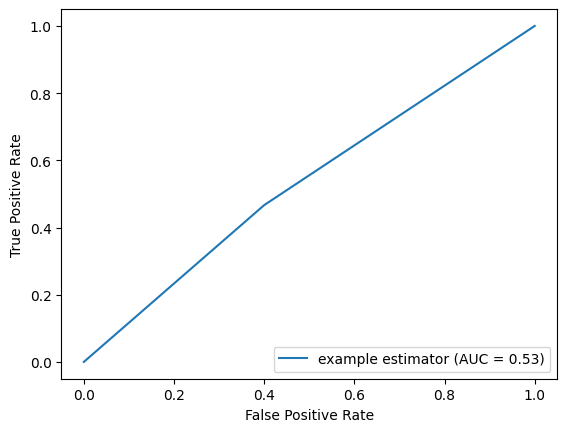

In [82]:
from sklearn import metrics
y=Y_test
pred=y_pred
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()